# **Data Collection**

## Objectives

* Get dataset from Kaggle and prepare it for further processing.

## Inputs

* Kaggle authentication token - kaggle.JSON file.

## Outputs

* Dataset: inputs/datasets/cherry_leaves_dataset 

## Additional Comments

* No comments. 


---

## Import packages

In [1]:
import numpy
import os

# Change working directory

* We are assuming you will store the notebooks in a sub folder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/mildew-detection-in-cherry-leaves'

# Get dataset from Kaggle

# Install Kaggle

In [5]:
# install kaggle package
%pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=711f26f3e1fd8ae337e2ca6a2eed1605a888eb4ce0b8bb6676c9742e890d0916
  Stored in directory: /home/gitpod/.cache/pip/wheels/03/f3/c7/fc5a63bb33d22177609b06c5b4c714b5eb3f1b195ce9dc5e47
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


Change Kaggle configuration directory to current working directory and allow token to be recognised by the session

In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

Set the Kaggle dataset and download it

In [8]:
KaggleDatasetPath = "codeinstitute/cherry-leaves"
DestinationFolder = "inputs/cherry_leaves_dataset"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

 75%|████████████████████████████▎         | 41.0M/55.0M [00:01<00:00, 25.8MB/s]
100%|██████████████████████████████████████| 55.0M/55.0M [00:01<00:00, 35.0MB/s]


Unzip downloaded file and delete the zip file

In [9]:
import zipfile
with zipfile.ZipFile(DestinationFolder + '/cherry-leaves.zip', 'r') as zip_ref:
    zip_ref.extractall(DestinationFolder)

os.remove(DestinationFolder + '/cherry-leaves.zip')

---

# Data Cleaning

Check for and remove any non-image files

In [10]:
def remove_non_image_file(my_data_dir):
    image_extension = ('.png', '.jpg', '.jpeg')
    folders = os.listdir(my_data_dir) 
    for folder in folders:
        files = os.listdir(my_data_dir + '/' + folder)
        
            #print(files)
        i = []
        j = []
        for given_file in files:
            if not given_file.lower().endswith(image_extension):
                file_location = my_data_dir + '/' + folder + '/' + given_file
                os.remove(file_location) # remove non image file
                i.append(1)
            else:
                j.append(1)
                pass
        print(f"Folder: {folder} - has image file",len(j))
        print(f"Folder: {folder} - has non-image file",len(i))

In [13]:
remove_non_image_file(my_data_dir='inputs/cherry_leaves_dataset/cherry-leaves/')

Folder: healthy - has image file 2104
Folder: healthy - has non-image file 0
Folder: powdery_mildew - has image file 2104
Folder: powdery_mildew - has non-image file 0


---

Import packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Create image montage to understand the dataset.

In [9]:
import itertools
import random
from matplotlib.image import imread


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  """
  logic
  - if label exists in the folder
  - check if your montage space is greater tha nsubset size
  - create list of axes indices based on nrows and ncols
  - create a Figure and display images
  - in this loop, load image and plot given image

  """
  sns.set_style("white")

  # labels = os.listdir(dir_path)  
  labels = os.listdir(my_data_dir)

  # subset the class you are interested to display
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x], 0)
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

Loop over labels and create image montage for each.

healthy


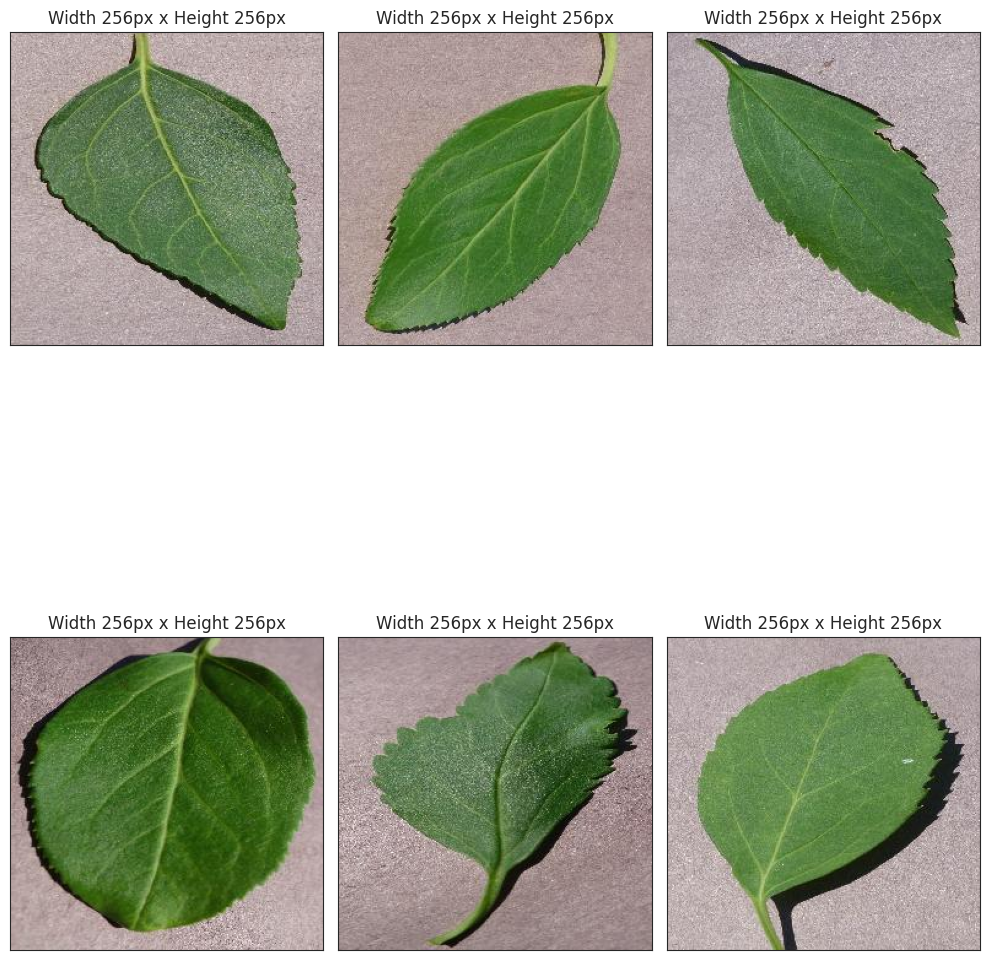



powdery_mildew


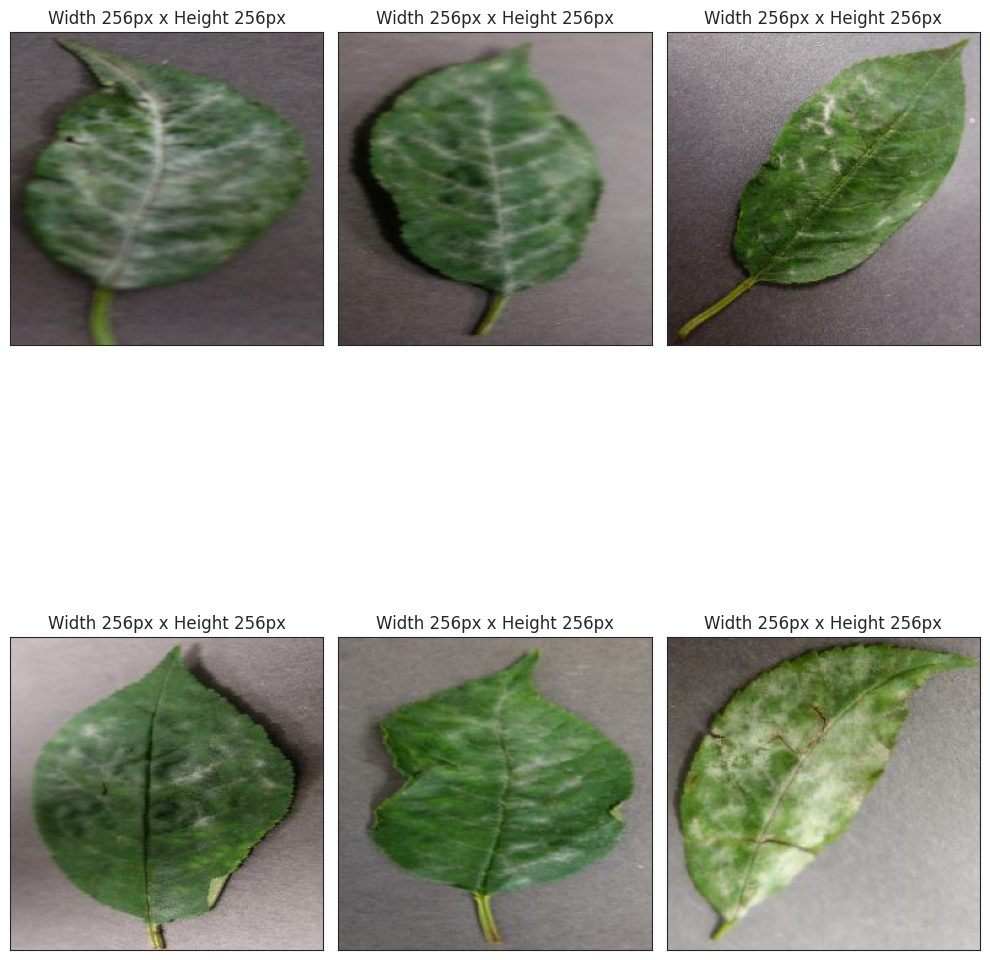

In [11]:
my_data_dir='inputs/cherry_leaves_dataset/cherry-leaves/'
labels = os.listdir(my_data_dir)

for label in labels:
  print(label)
  image_montage(dir_path= my_data_dir,
                label_to_display= label,
                nrows=2, ncols=3,
                figsize=(10,15)
                )
  print("\n")

## Split train, validation and test sets

In [5]:
import os
import shutil
import random
import joblib

def split_train_validation_test_images(my_data_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
  
  if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
    print("train_set_ratio + validation_set_ratio + test_set_ratio should sum 1.0")
    return

  # gets classes labels
  labels = os.listdir(my_data_dir) # it should get only the folder name
  if 'test' in labels:
    pass
  else: 
    # create train, test folders with classess labels sub-folder
    for folder in ['train','validation','test']:
      for label in labels:
        os.makedirs(name=my_data_dir+ '/' + folder + '/' + label)

    for label in labels:

      files = os.listdir(my_data_dir + '/' + label)
      random.shuffle(files)

      train_set_files_qty = int(len(files) * train_set_ratio)
      validation_set_files_qty = int(len(files) * validation_set_ratio)

      count = 1
      for file_name in files:
        if count <= train_set_files_qty:
          # move given file to train set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                      my_data_dir + '/train/' + label + '/' + file_name)
          

        elif count <= (train_set_files_qty + validation_set_files_qty ):
          # move given file to validation set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                      my_data_dir + '/validation/' + label + '/' + file_name)

        else:
          # move given file to test set
          shutil.move(my_data_dir + '/' + label + '/' + file_name,
                  my_data_dir + '/test/' +label + '/'+ file_name)
          
        count += 1

      os.rmdir(my_data_dir + '/' + label)

Split ratio is:

* 0.7 training set
* 0.1 validation set
* 0.2 test set

In [6]:
split_train_validation_test_images(my_data_dir = f"inputs/cherry_leaves_dataset/cherry-leaves",
                        train_set_ratio = 0.7,
                        validation_set_ratio=0.1,
                        test_set_ratio=0.2
                        )

                       

---

# Conclusions and Next Steps

* The supplied dataset contains 2104 images of healthy cherry leaves and 2104 images of cherry leaves with powdery mildew, ie there is a class balance.
* The images are 256 x 256 pixels in size.
* The image backgrounds are the same (plain grey) in both classes.
* There appears to be a clear distinction between healthy leaves and those with powdery mildew, the latter showing white markings. 
* The some of the powdery mildew images appear blurred and there is less contrast between the leaves and the background.

Next steps:
* Resize the images to 50 x 50 pixels to prevent storage issues when pushing to GitHub.
* Obtain the 'average' image and the variability image for each class and contrast between the classes.
* Create an image montage for use in the Streamlit dashboard.
